In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Project

In [200]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.figure_factory as ff

from pandas_profiling import ProfileReport

import warnings  # For hiding warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [80]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [81]:
report_test = ProfileReport(df_test, title='Profiling Titanic test data', minimal=True)
report_test

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
report_train = ProfileReport(df_train, title='Profiling Titanic Train data', minimal=True)
report_train

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Using a for loop in Python, we can quickly figure out the number of missing values in each column

In [83]:
missing_data = df_test.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

PassengerId
False    418
Name: PassengerId, dtype: int64

Pclass
False    418
Name: Pclass, dtype: int64

Name
False    418
Name: Name, dtype: int64

Sex
False    418
Name: Sex, dtype: int64

Age
False    332
True      86
Name: Age, dtype: int64

SibSp
False    418
Name: SibSp, dtype: int64

Parch
False    418
Name: Parch, dtype: int64

Ticket
False    418
Name: Ticket, dtype: int64

Fare
False    417
True       1
Name: Fare, dtype: int64

Cabin
True     327
False     91
Name: Cabin, dtype: int64

Embarked
False    418
Name: Embarked, dtype: int64



In [84]:
missing_data = df_train.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [85]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
df_test.shape

(418, 11)

In [87]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df_train.shape

(891, 12)

As we can see that "Cabin" column in both Test and Train data has too many null values so we will drop that column

In [89]:
df_test.drop('Cabin',axis=1,inplace=True)
df_train.drop('Cabin',axis=1,inplace=True)

In [ ]:
#extracting the title from name column
name = df_test['Name'].str.split(',',expand=True)
title = name[1].str.split('.',expand=True)
df_test['Title']=title[0] 

name_tr = df_train['Name'].str.split(',',expand=True)
title_tr = name_tr[1].str.split('.',expand=True)
df_train['Title']=title_tr[0] 

In [91]:
maping = {' Col':'Mr',' Capt':'Mr',' Dona':'Mrs',' Rev':'Rev',
          ' Ms':'Miss',' Mr':'Mr' ,' Miss':'Miss',' Mrs':'Mrs', 
          ' Master':'Master',' Dr':'Dr'}
df_test['Title'] =  df_test['Title'].map(maping)

In [92]:
df_test['Title'].value_counts()

Mr        242
Miss       79
Mrs        73
Master     21
Rev         2
Dr          1
Name: Title, dtype: int64

In [93]:
df_train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 the Countess      1
 Don               1
 Mme               1
 Jonkheer          1
 Lady              1
 Ms                1
 Sir               1
 Capt              1
Name: Title, dtype: int64

In [94]:
mapping = {' Col':'Mr',' Capt':'Mr',' Dona':'Mrs',' Rev':'Rev',' Ms':'Miss',' Mr':'Mr' ,
          ' Miss':'Miss',' Mrs':'Mrs', ' Master':'Master',' Dr':'Dr', ' Don':'Mr', 
          ' Mlle':'Miss',' Major':'Mr', ' Sir':'Mr', 'Jonkheer':'Mr', ' the Countess':'Mrs', 
          ' Mme':'Mrs', ' Lady':'Mrs'
         }
df_train['Title'] =  df_train['Title'].map(mapping)

In [95]:
df_train['Title'].value_counts()

Mr        524
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

In [96]:
df_test.groupby('Title')['Age'].mean()

Title
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.194595
Mrs       38.904762
Rev       35.500000
Name: Age, dtype: float64

We will replace the missing values of age in Test data with the Avegrage of Age by different Titles

In [97]:
def age_fill_test(columns):
    Age = columns[0]
    Title = columns[1]
    if pd.isnull(Age):
        if Title =='Dr' :
            return 53
        elif  Title == 'Master' :
            return 7
        elif  Title == 'Miss' :
            return 22
        elif  Title == 'Mr' :
            return 32
        elif  Title == 'Mrs' :
            return 39
        else:
            return 35
    else : 
        return Age

In [98]:
df_test.Age = df_test[['Age','Title']].apply(age_fill_test,axis=1) 

In [99]:
#As we can see that now there are no null values in the age column
df_test['Age'].isnull().value_counts()

False    418
Name: Age, dtype: int64

In [100]:
df_train.groupby('Title')['Age'].mean()

Title
Dr        42.000000
Master     4.574167
Miss      21.845638
Mr        32.727160
Mrs       35.873874
Rev       43.166667
Name: Age, dtype: float64

**We will replace the missing values of age in Train data with the Avegrage of Age by different Titles**

In [101]:
def age_fill_train(columns):
    Age = columns[0]
    Title = columns[1]
    if pd.isnull(Age):
        if Title =='Dr' :
            return 42
        elif  Title == 'Master' :
            return 5
        elif  Title == 'Miss' :
            return 22
        elif  Title == 'Mr' :
            return 33
        elif  Title == 'Mrs' :
            return 36
        else:
            return 43
    else : 
        return Age

In [102]:
df_train['Age'] = df_train[['Age','Title']].apply(age_fill_train,axis=1) 

In [103]:
#As we can see that now there are no null values in the age column
df_train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [104]:
#Fare column  has only one null row. We will drop that row
df_test.dropna(subset=["Fare"], axis=0,inplace=True)

Embarked field has tow null values. we filled those values by backfill method

In [105]:
df_train['Embarked'].fillna(method='backfill',inplace=True)

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "Fare" is a real valued variable ranging from 0.0 to 512.3292, it has 169 unique values. To get better analysis we divde this data in three differnt categories </p>

<p>We will use the Pandas method 'cut' to segment the 'Fare' column into 3 bins </p>



In [106]:
#lets divde the fare field in to thre categeoris high, medium, low
bins = np.linspace(min(df_test["Fare"]), max(df_test["Fare"]), 4)
bins

array([  0.    , 170.7764, 341.5528, 512.3292])

In [107]:
#We set group names:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df_test['Fare']" belongs to. 

In [108]:
df_test['Fare_binned'] = pd.cut(df_test['Fare'], bins, labels=group_names, include_lowest=True )
df_test[['Fare','Fare_binned']].head(8)

,Fare,Fare_binned
0,7.8292,Low
1,7.0000,Low
2,9.6875,Low
3,8.6625,Low
4,12.2875,Low
5,9.2250,Low
6,7.6292,Low
7,29.0000,Low


We will perforn the similar binning to our train dataset as well.

In [109]:
#lets divde the fare field in to thre categeoris high, medium, low
bins = np.linspace(min(df_train["Fare"]), max(df_train["Fare"]), 4)
bins

array([  0.    , 170.7764, 341.5528, 512.3292])

In [110]:
#We set group names:
group_names = ['Low', 'Medium', 'High']

In [111]:
df_train['Fare_binned'] = pd.cut(df_train['Fare'], bins, labels=group_names, include_lowest=True )
df_train[['Fare','Fare_binned']].head(8)

,Fare,Fare_binned
0,7.2500,Low
1,71.2833,Low
2,7.9250,Low
3,53.1000,Low
4,8.0500,Low
5,8.4583,Low
6,51.8625,Low
7,21.0750,Low


**Bins Visualization**

Text(0.5, 1.0, 'Fare bins Test data')

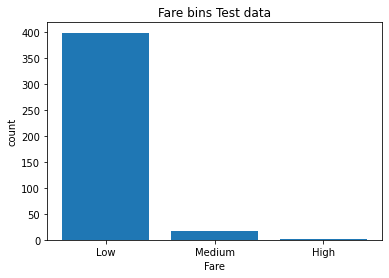

In [112]:
pyplot.bar(group_names, df_test["Fare_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Fare")
plt.pyplot.ylabel("count")
plt.pyplot.title("Fare bins Test data")

Text(0.5, 1.0, 'Fare bins Train data')

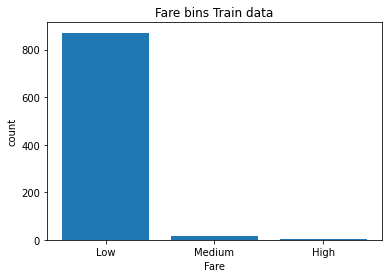

In [113]:
pyplot.bar(group_names, df_train["Fare_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Fare")
plt.pyplot.ylabel("count")
plt.pyplot.title("Fare bins Train data")

<h2 id="indicator"> Dummy variable</h2>
<b>What is an Dummy variable?</b>
<p>
<p> dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value</p>

<b>Why we use Dummy variables?</b>

<p>
    So we can use categorical variables for regression analysis.
</p>
<b>Example</b>
<p>
    We see the column "Sex" has two unique values, "Male" or "female". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Sex" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>
    we will apply the similar method to our embarked column too


In [114]:
dummy_variable = pd.get_dummies(df_test["Sex"])
dummy_variable.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [115]:
# merge data frame "df_test" and "dummy_variable" 
df_test = pd.concat([df_test, dummy_variable], axis=1)

In [116]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_binned,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,Low,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,Low,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,Low,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,Low,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,Low,1,0


We will use the similar method to our Train data.


In [117]:
dummy_variable_tr = pd.get_dummies(df_train["Sex"])
dummy_variable_tr.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [118]:
# merge data frame "df_train" and "dummy_variable_tr" 
df_train = pd.concat([df_train, dummy_variable_tr], axis=1)

In [119]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_binned,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Low,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Low,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Low,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Low,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Low,0,1


In [120]:
dummy_variable_1 = pd.get_dummies(df_test['Embarked'])
dummy_variable_1.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [121]:
dummy_variable_1.rename(columns={'C':'Embarked-C','Q':'Embarked-Q','S':'Embarked-S'},inplace=True)

In [122]:
# merge data frame "df_test" and "dummy_variable_1" 

df_test = pd.concat([df_test, dummy_variable_1], axis=1)



In [123]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_binned,female,male,Embarked-C,Embarked-Q,Embarked-S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,Low,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,Low,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,Low,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,Low,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,Low,1,0,0,0,1


We will use the similar method to our Train data.


In [124]:
dummy_variable_tr1 = pd.get_dummies(df_train['Embarked'])
dummy_variable_tr1.rename(columns={'C':'Embarked-C','Q':'Embarked-Q','S':'Embarked-S'},inplace=True)
dummy_variable_tr1.head()

,Embarked-C,Embarked-Q,Embarked-S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [125]:
# merge data frame "df_test" and "dummy_variable_1" 

df_train = pd.concat([df_train, dummy_variable_tr1], axis=1)



In [126]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_binned,female,male,Embarked-C,Embarked-Q,Embarked-S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Low,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Low,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Low,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Low,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Low,0,1,0,0,1


Lets create a new column for family size by combing number of siblings  and spouses

In [127]:
# we incremented by 1 because passeges itslef count as a memeber 
df_test['FamilySize'] = df_test['Parch'] +df_test['SibSp'] + 1
#we donot need the SibSp and Parch column any more.
df_test.drop(['SibSp','Parch'],axis=1,inplace= True)

In [128]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_binned,female,male,Embarked-C,Embarked-Q,Embarked-S,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,Low,0,1,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,Low,1,0,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,Low,0,1,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,Low,0,1,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,Low,1,0,0,0,1,3


We will use the similar method to our Train data.


In [130]:
# we incremented by 1 because passeges itslef count as a memeber 
df_train['FamilySize'] = df_train['Parch'] +df_train['SibSp'] + 1
#we donot need the SibSp and Parch column any more.
df_train.drop(['SibSp','Parch'],axis=1,inplace= True)

In [132]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,Fare_binned,female,male,Embarked-C,Embarked-Q,Embarked-S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Mr,Low,0,1,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Mrs,Low,1,0,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Miss,Low,1,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Mrs,Low,1,0,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Mr,Low,0,1,0,0,1,1


# Exploratory Data-Analysis

In [133]:
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,Fare_binned,female,male,Embarked-C,Embarked-Q,Embarked-S,FamilySize
count,417.000000,417.000000,417,417,417.000000,417,417.000000,417,417,417,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
unique,NaN,NaN,417,2,NaN,362,NaN,3,6,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Corbett, Mrs. Walter H (Irene Colvin)",male,NaN,PC 17608,NaN,S,Mr,Low,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,265,NaN,5,NaN,269,241,399,NaN,NaN,NaN,NaN,NaN,NaN
mean,1100.635492,2.263789,NaN,NaN,30.124700,NaN,35.627188,NaN,NaN,NaN,0.364508,0.635492,0.244604,0.110312,0.645084,1.841727
std,120.923774,0.842077,NaN,NaN,12.950372,NaN,55.907576,NaN,NaN,NaN,0.481870,0.481870,0.430369,0.313654,0.479063,1.520338
min,892.000000,1.000000,NaN,NaN,0.170000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.000000,1.000000,NaN,NaN,22.000000,NaN,7.895800,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1101.000000,3.000000,NaN,NaN,30.000000,NaN,14.454200,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1205.000000,3.000000,NaN,NaN,36.500000,NaN,31.500000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000


In [134]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,Fare_binned,female,male,Embarked-C,Embarked-Q,Embarked-S,FamilySize
count,891.000000,891.000000,891.000000,891,891,891.000000,891,891.000000,891,890,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,681,NaN,3,6,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Bishop, Mrs. Dickinson H (Helen Walton)",male,NaN,1601,NaN,S,Mr,Low,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,7,NaN,645,524,871,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.852043,NaN,32.204208,NaN,NaN,NaN,0.352413,0.647587,0.189675,0.086420,0.723906,1.904602
std,257.353842,0.486592,0.836071,NaN,NaN,13.287350,NaN,49.693429,NaN,NaN,NaN,0.477990,0.477990,0.392264,0.281141,0.447315,1.613459
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,NaN,7.910400,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,30.000000,NaN,14.454200,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,36.000000,NaN,31.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000


In [135]:
test_corr = df_test.corr()
X=list(test_corr.index.values)
Y=list(test_corr.columns.values)
Z=np.array(test_corr.values)
z_text = np.around(Z, decimals=6)
fig = ff.create_annotated_heatmap(z=Z, 
                                  x=X,
                                  y=Y,
                                 annotation_text=z_text)
fig.update_layout(title='Test data correaltion')
fig.show()

In [136]:
train_corr = df_train.corr()
X=list(train_corr.index.values)
Y=list(train_corr.columns.values)
Z=np.array(train_corr.values)
z_text = np.around(Z, decimals=6)
fig = ff.create_annotated_heatmap(z=Z, 
                                  x=X,
                                  y=Y,
                                 annotation_text=z_text)
fig.update_layout(title='Train data correaltion')

fig.show()

<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>


**Weak linear realtionship**

In [137]:
fig1 = px.scatter(df_train, x="Age", y="Survived", trendline="ols")
fig1.show()

In [138]:
fig1 = px.scatter(df_train, x="FamilySize", y="Survived", trendline="ols")
fig1.show()

**Boxplot**

In [139]:
df_em = df_train.groupby('Embarked')['Embarked'].count()

In [140]:
df_em

Embarked
C    169
Q     77
S    645
Name: Embarked, dtype: int64

In [141]:
fig = px.bar(df_train,x='Embarked',y='Survived',color='Embarked')
fig.show()

In [142]:
fig = px.bar(df_train,x='Sex',y='Survived',color='Sex')
fig.show()

Columns that we need for test and train data

In [143]:
# drop original column "Embaked" from "df_train"
df_train.drop("Embarked", axis = 1, inplace=True)

# drop original column "Embaked" from "df_test"
df_test.drop("Embarked", axis = 1, inplace=True)

# drop original column "Sex" from "df_test"
df_test.drop("Sex", axis = 1, inplace=True)

# drop original column "Sex" from "df_train"
df_train.drop("Sex", axis = 1, inplace=True)

#Drop the passenger id, Name, Ticket, Title,Fare_binned from both test and train dataset
#df_test.drop("PassengerId", axis = 1, inplace=True)
df_test.drop("Name", axis = 1, inplace=True)
df_test.drop("Ticket", axis = 1, inplace=True)
df_test.drop("Title", axis = 1, inplace=True)
df_test.drop("Fare_binned", axis = 1, inplace=True)

#df_train.drop("PassengerId", axis = 1, inplace=True)
df_train.drop("Name", axis = 1, inplace=True)
df_train.drop("Ticket", axis = 1, inplace=True)
df_train.drop("Title", axis = 1, inplace=True)
df_train.drop("Fare_binned", axis = 1, inplace=True)

In [144]:
df_train.head()

,PassengerId,Survived,Pclass,Age,Fare,female,male,Embarked-C,Embarked-Q,Embarked-S,FamilySize
0,1,0,3,22.0,7.2500,0,1,0,0,1,2
1,2,1,1,38.0,71.2833,1,0,1,0,0,2
2,3,1,3,26.0,7.9250,1,0,0,0,1,1
3,4,1,1,35.0,53.1000,1,0,0,0,1,2
4,5,0,3,35.0,8.0500,0,1,0,0,1,1


In [145]:
df_test.head()

,PassengerId,Pclass,Age,Fare,female,male,Embarked-C,Embarked-Q,Embarked-S,FamilySize
0,892,3,34.5,7.8292,0,1,0,1,0,1
1,893,3,47.0,7.0000,1,0,0,0,1,2
2,894,2,62.0,9.6875,0,1,0,1,0,1
3,895,3,27.0,8.6625,0,1,0,0,1,1
4,896,3,22.0,12.2875,1,0,0,0,1,3


# Model training

In [178]:
#libraries we need for our Model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error

In [147]:
#defining the dependent and indepndent variable
x_data=df_train.drop(['Survived','PassengerId'],axis=1) #indepndent variable
y_data=df_train['Survived'] #dependent variable

In [221]:
#spliting the training and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

**Models**

In [222]:
#LogisticRegression model
lr = LogisticRegression()
lr.fit(x_train,y_train)
#accuracy report
lr_sc = accuracy_score(y_test,lr.predict(x_test))
print('Accuracy score: {a}'.format(a=lr_sc))
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(x_test))}")
print(classification_report(y_test,lr.predict(x_test)))
print(f"The mean square error is: {mean_squared_error(y_test, lr.predict(x_test))}")

Accuracy score: 0.7880299251870324
Confusion Matrix :- 
 [[210  41]
 [ 44 106]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       251
           1       0.72      0.71      0.71       150

    accuracy                           0.79       401
   macro avg       0.77      0.77      0.77       401
weighted avg       0.79      0.79      0.79       401

The mean square error is: 0.2119700748129676


In [214]:
#hyperparameter for LogisticRegression model to make it more strong
parameters1= [{ 'penalty': ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10]}]
Grid1 = GridSearchCV(lr, parameters1,cv=5,n_jobs = -1)
Grid1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10],
                          'penalty': ['l1', 'l2']}])

In [215]:
#obtian the best parameters and score
print(Grid1.best_params_)
print(Grid1.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.8108975489331687


The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [216]:
BestRR=Grid1.best_estimator_
BestRR
lr_sc = accuracy_score(y_test,BestRR.predict(x_test))
print('Accuracy score: {a}'.format(a=lr_sc))
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, BestRR.predict(x_test))}")
print(classification_report(y_test,BestRR.predict(x_test)))
print(f"The mean square error is: {mean_squared_error(y_test, BestRR.predict(x_test))}")

Accuracy score: 0.8095238095238095
Confusion Matrix :- 
 [[199  22]
 [ 46  90]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       221
           1       0.80      0.66      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357

The mean square error is: 0.19047619047619047


**Random Forest model**

In [223]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_p= rf.predict(x_test)
lr_sc = accuracy_score(y_test,rf.predict(x_test))
print('Accuracy score: {a}'.format(a=lr_sc))
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, rf.predict(x_test))}")
print(classification_report(y_test,rf.predict(x_test)))
print(f"The mean square error is: {mean_squared_error(y_test, rf.predict(x_test))}")

Accuracy score: 0.800498753117207
Confusion Matrix :- 
 [[214  37]
 [ 43 107]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       251
           1       0.74      0.71      0.73       150

    accuracy                           0.80       401
   macro avg       0.79      0.78      0.79       401
weighted avg       0.80      0.80      0.80       401

The mean square error is: 0.19950124688279303


**From our two model we can see that random has more accuracy and less mean suare erro.So, we will use this model to for prediction.**

In [218]:
Survive_predicted=rf.predict(df_test.drop('PassengerId',axis=1))
Survive=pd.Series(Survive_predicted)

**Saving the output for submission**

In [234]:
#saving our solution to FinalSubmission.csv
df_final = pd.concat([df_test['PassengerId'],Survive],axis=1,keys=['PassengerId','Survived'])
df_final.to_csv('FinalSubmission.csv',index=False)

# If you like the notebook please upvote this. ThankYou